In [1]:
%pylab inline

from PyTools import err, binner
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
rc("lines", linewidth=1.0)
rc("patch", linewidth=1.0)
rc("font", family="sans-serif", serif="Helvetica", size=20)
#rc("text", usetex=False)
rc("savefig", dpi=92)
rc("legend", fontsize="x-small")
rc("xtick", labelsize="x-small")
rc("ytick", labelsize="x-small")

In [3]:
idir = "../inputs/real_deal6/"
odir = "../outputs/real_deal6/"

table = genfromtxt(odir+"REAL_DEAL_NEM_test.txt", dtype=None, names=True)
table = delete(table, where(np.isinf(table["u_mag"]))[0], axis=0)

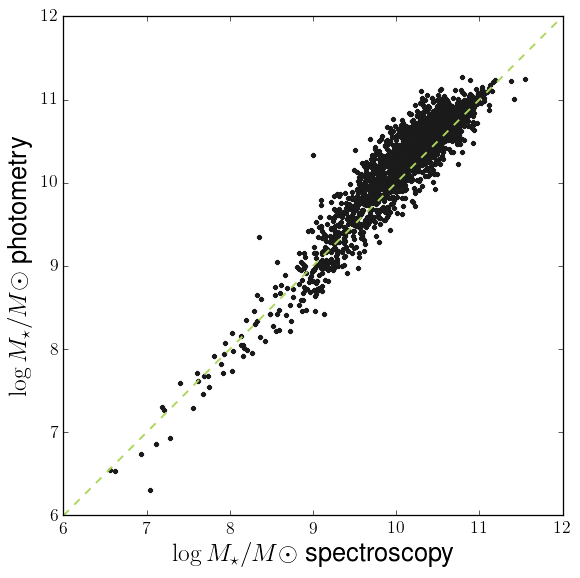

In [4]:
figure(figsize=(7, 7))

plot(log10(table["M_spec"]), log10(table["M_jpas"]), ".", color="0.1")
rm = ylim(xlim(6, 12))
plot(rm, rm, "--", lw=1.5)
gca().set_aspect("equal")

xlabel(r"$\log{M_\star/M\odot}$ spectroscopy")
ylabel(r"$\log{M_\star/M\odot}$ photometry")

savefig("mass_consistency.png", bbox_inches="tight")

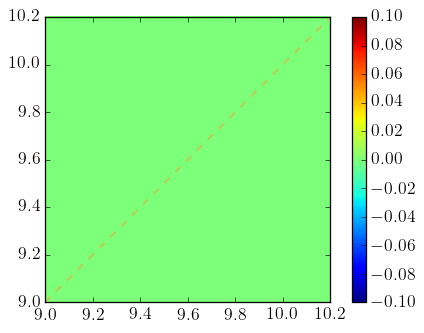

In [16]:
mask = ((table["u_mag"] - table["r_mag"])>2.22)&(table["log_Z_M_spec"]<=0.0)

hist2d(table["log_Z_M_spec"][mask], table["log_Z_M_jpas"][mask], 70, [[9., 10.2], [9., 10.2]])
colorbar()
#scatter(table["log_t_M_spec"], table["log_t_M_jpas"], lw=0, s=1, c="k", alpha=0.8)
#plot(table["log_t_M_spec"][mask], table["log_t_M_jpas"][mask], ".")
rm = ylim(xlim(9., 10.2))
plot(rm, rm, "--", lw=2)
gca().set_aspect("equal")

<matplotlib.colorbar.Colorbar instance at 0x7f9274f09680>

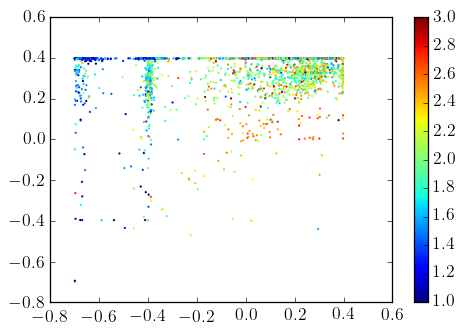

In [17]:
scatter(table["log_Z_M_spec"], table["log_Z_M_jpas"], lw=0, s=3, c=table["u_mag"]-table["r_mag"], vmin=1, vmax=3)
colorbar()

(array([  3.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   1.,   3.,   4.,  19.,   5.,   1.,   3.,   2.,
          1.,   0.,   1.,   2.,   1.,   1.,   2.,   2.,   5.,   7.,   5.,
          5.,   3.,   8.,   8.,  10.,   9.,  11.]),
 array([ -6.99000000e-01,  -6.81535480e-01,  -6.64070960e-01,
         -6.46606440e-01,  -6.29141920e-01,  -6.11677400e-01,
         -5.94212880e-01,  -5.76748360e-01,  -5.59283840e-01,
         -5.41819320e-01,  -5.24354800e-01,  -5.06890280e-01,
         -4.89425760e-01,  -4.71961240e-01,  -4.54496720e-01,
         -4.37032200e-01,  -4.19567680e-01,  -4.02103160e-01,
         -3.84638640e-01,  -3.67174120e-01,  -3.49709600e-01,
         -3.32245080e-01,  -3.14780560e-01,  -2.97316040e-01,
         -2.79851520e-01,  -2.62387000e-01,  -2.44922480e-01,
         -2.27457960e-01,  -2.09993440e-01,  -1.92528920e-01,
         -1.75064400e-01,  -1.57599880e-01,  -1.40135360e-01,
         -1.22670840e-01,  -1.05206320e-01, 

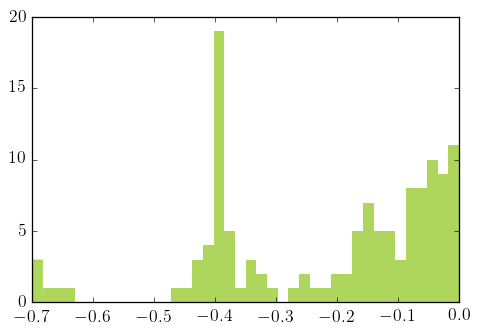

In [7]:
hist(table["log_Z_M_spec"][mask], 40, lw=0)

(array([   2.,    3.,    7.,   10.,   20.,   72.,  173.,  103.,   54.,
          33.,   35.,   27.,   15.,    9.,   14.,    7.,    6.,    0.,
           1.,    3.]),
 array([-0.4758  , -0.397165, -0.31853 , -0.239895, -0.16126 , -0.082625,
        -0.00399 ,  0.074645,  0.15328 ,  0.231915,  0.31055 ,  0.389185,
         0.46782 ,  0.546455,  0.62509 ,  0.703725,  0.78236 ,  0.860995,
         0.93963 ,  1.018265,  1.0969  ]),
 <a list of 20 Patch objects>)

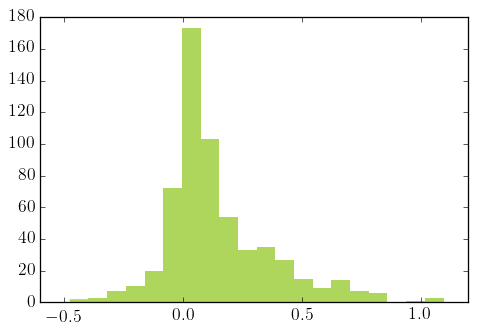

In [8]:
mask = ((table["u_mag"] - table["r_mag"])>2.22)

hist(-table["log_Z_M_spec"][mask]+table["log_Z_M_jpas"][mask], 20, lw=0)

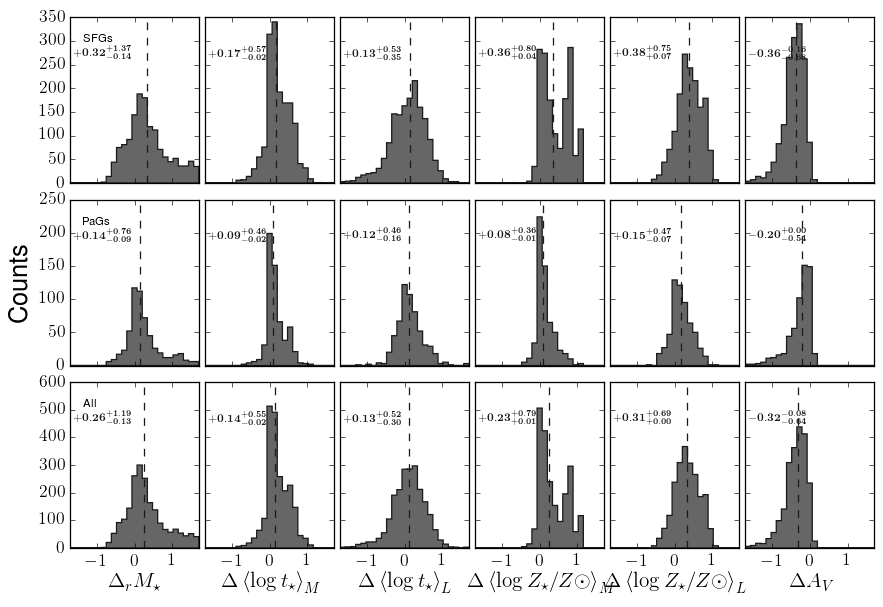

In [28]:
fig, axs = subplots(3, 6, figsize=(10, 7), sharex=True, sharey="row")

lcolor = table["u_mag"]-table["r_mag"]
ln = "M_spec log_t_M_spec log_t_L_spec log_Z_M_spec log_Z_L_spec Av_spec".split()
mn = "M_jpas log_t_M_jpas log_t_L_jpas log_Z_M_jpas log_Z_L_jpas Av_jpas".split()
rl = [True]+5*[False]
res_lbs = [r"$\Delta_r M_\star$", r"$\Delta\left<\log{t_\star}\right>_M$", r"$\Delta\left<\log{t_\star}\right>_L$",
           r"$\Delta\left<\log{Z_\star/Z\odot}\right>_M$", r"$\Delta\left<\log{Z_\star/Z\odot}\right>_L$", r"$\Delta A_V$"]
tsize="9"

lm = xlim(-1.7, +1.7)
axs[0, 0].set_xticks([-1, 0, 1])

for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])) :
    if   i == 0 :
        mask = lcolor <  2.22
    elif i == 1 :
        mask = lcolor >= 2.22
        
        if j == 0 : axs[i, j].set_ylabel("Counts")
    else :
        mask = ones(lcolor.size, dtype=bool)
        
        axs[i, j].set_xlabel(res_lbs[j], size="small")

    res = err(table[ln[j]], table[mn[j]], rl[j])[mask]
    med = median(res)
    p16, p84 = percentile(res, [16.0, 84.0])

    axs[i, j].hist(res, 25, histtype="stepfilled", fc="0.4", ec="0.1", range=lm)

    axs[i, j].axvline(med, ls="--", color="0.1")

    st_text = r"$\mathbf{%+.2f_{%+.2f}^{%+.2f}}$"%(med, p16, p84)
    axs[i, j].text(0.02, 0.75, st_text, fontsize=tsize, color="0.1", ha="left", transform=axs[i, j].transAxes)

    if j == 0 :
        if i == 0 : axs[i, j].text(0.1, 0.9, "SFGs", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)
        if i == 1 : axs[i, j].text(0.1, 0.9, "PaGs", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)
        if i == 2 : axs[i, j].text(0.1, 0.9, "All", fontsize=tsize, ha="left", va="top", transform=axs[i, j].transAxes)

tight_layout()
subplots_adjust(hspace=0.1, wspace=0.05)

savefig("JPAS-SPEC_test.pdf", bbox_inches="tight")

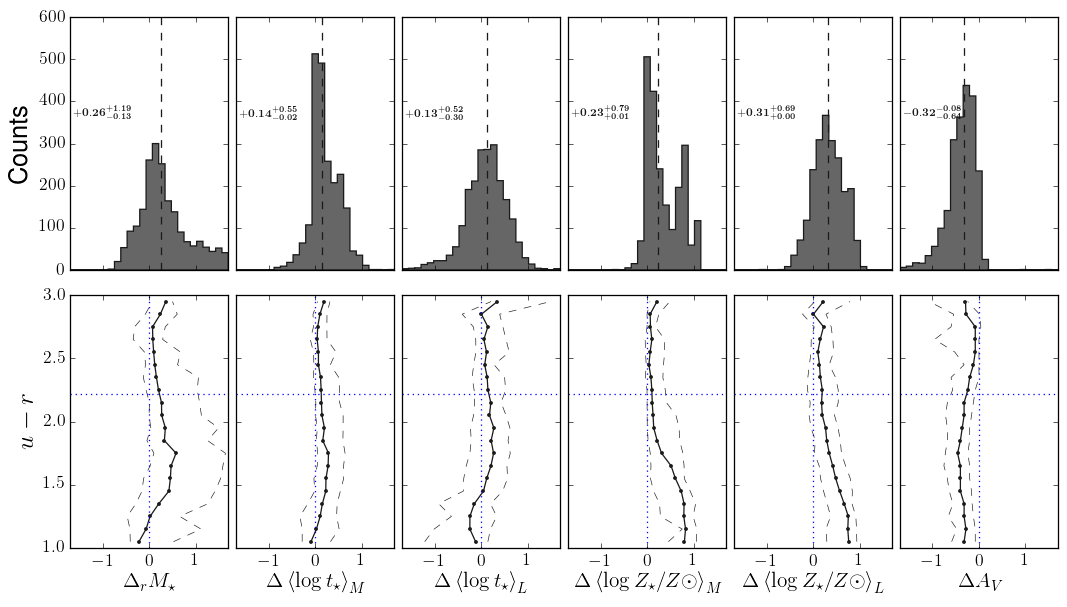

In [29]:
fig, axs = subplots(2, 6, figsize=(12, 7), sharex=True, sharey="row")

lm = xlim(-1.7, +1.7)
axs[0, 0].set_xticks([-1, 0, 1])

for i, j in product(xrange(axs.shape[0]), xrange(axs.shape[1])):
    res = err(table[ln[j]], table[mn[j]], rl[j])
    med = median(res)
    p16, p84 = percentile(res, [16.0, 84.0])
    
    if j == 0:
        if i == 0: axs[i, j].set_ylabel("Counts")
        if i == 1: axs[i, j].set_ylabel(r"$u-r$")
    
    if i == 0:
        axs[i, j].hist(res, 25, range=lm, histtype="stepfilled", fc="0.4", ec="0.1")
        
        axs[i, j].axvline(med, ls="--", color="0.1")
        
        st_text = r"$\mathbf{%+.2f_{%+.2f}^{%+.2f}}$"%(med, p16, p84)
        axs[i, j].text(0.02, 0.60, st_text, fontsize=tsize, color="0.1", ha="left", transform=axs[i, j].transAxes)
    else:
        x, y, e = binner(lcolor, res, "median", 20, rang=(1, 3), ebar=True)

        axs[i, j].plot(y, x, "-o", color="0.1", mew=0, ms=3)
        axs[i, j].plot(y-e[0], x, "--", color="0.1", lw=0.5)
        axs[i, j].plot(y+e[1], x, "--", color="0.1", lw=0.5)
        axs[i, j].axvline(ls=":")
        axs[i, j].axhline(2.22, ls=":")
        
        axs[i, j].set_xlabel(res_lbs[j], size="small")
        axs[i, j].set_ylim(1.0, 3.0)

tight_layout()
subplots_adjust(wspace=0.05, hspace=0.1)

savefig("JPAS-SPEC_2_test.png", bbox_inches="tight")

(array([   3.,    0.,    0.,    4.,    9.,    7.,   18.,   47.,   50.,
          76.,  131.,  174.,  220.,  214.,  252.,  226.,  219.,  166.,
         144.,  124.,   65.,   19.,    5.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]),
 array([ 0.        ,  0.13333333,  0.26666667,  0.4       ,  0.53333333,
         0.66666667,  0.8       ,  0.93333333,  1.06666667,  1.2       ,
         1.33333333,  1.46666667,  1.6       ,  1.73333333,  1.86666667,
         2.        ,  2.13333333,  2.26666667,  2.4       ,  2.53333333,
         2.66666667,  2.8       ,  2.93333333,  3.06666667,  3.2       ,
         3.33333333,  3.46666667,  3.6       ,  3.73333333,  3.86666667,  4.        ]),
 <a list of 30 Patch objects>)

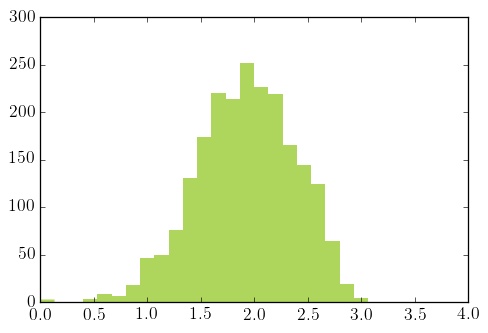

In [11]:
hist(lcolor, 30, range=(0, 4), lw=0)

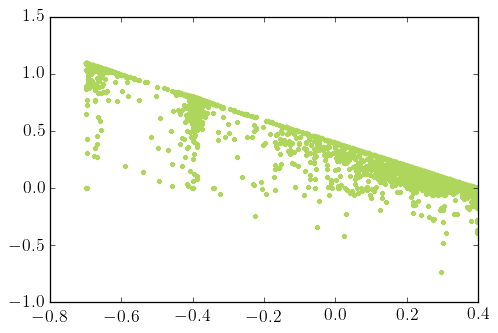

In [25]:
plot(table["log_Z_M_spec"], table["log_Z_M_jpas"]-table["log_Z_M_spec"], ".")

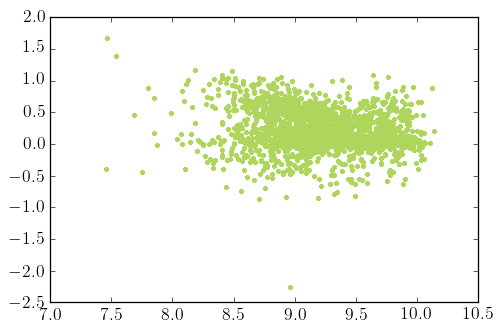

In [21]:
plot(table["log_t_L_spec"], table["log_t_M_jpas"]-table["log_t_M_spec"], ".")

In [27]:
ln

['M_jpas',
 'log_t_M_jpas',
 'log_t_L_jpas',
 'log_Z_M_jpas',
 'log_Z_L_jpas',
 'Av_jpas']